In [1]:
# Cell 1: imports & load
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv('players_20.csv', low_memory=False)
print("Shape:", df.shape)
# show first rows & column list
display(df.head())
print("\nColumns:", list(df.columns))
# missing value summary (counts and percent)
mv = df.isna().sum().sort_values(ascending=False)
mv_pct = (mv / len(df) * 100).round(2)
missing = pd.concat([mv, mv_pct], axis=1)
missing.columns = ['missing_count','missing_percent']
display(missing[missing['missing_count']>0].head(200))


Shape: (18278, 104)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3



Columns: ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power

,missing_count,missing_percent
loaned_from,17230,94.27
nation_position,17152,93.84
nation_jersey_number,17152,93.84
player_tags,16779,91.80
gk_kicking,16242,88.86
gk_diving,16242,88.86
gk_handling,16242,88.86
gk_reflexes,16242,88.86
gk_speed,16242,88.86
gk_positioning,16242,88.86


In [2]:
# Cell: Drop columns with too many missing values (> 50%)
drop_cols = [
    'loaned_from', 'nation_position', 'nation_jersey_number', 'player_tags',
    'gk_kicking', 'gk_diving', 'gk_handling', 'gk_reflexes',
    'gk_speed', 'gk_positioning', 'player_traits'
]

df = df.drop(columns=drop_cols, errors='ignore')
print("Dropped columns:", drop_cols)
print("New shape after dropping:", df.shape)


Dropped columns: ['loaned_from', 'nation_position', 'nation_jersey_number', 'player_tags', 'gk_kicking', 'gk_diving', 'gk_handling', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits']
New shape after dropping: (18278, 93)


In [3]:
# Check again
mv_after = df.isna().sum().sort_values(ascending=False)
mv_pct_after = (mv_after / len(df) * 100).round(2)
missing_after = pd.concat([mv_after, mv_pct_after], axis=1)
missing_after.columns = ['missing_count', 'missing_percent']
display(missing_after[missing_after['missing_count'] > 0].head(20))


,missing_count,missing_percent
shooting,2036,11.14
pace,2036,11.14
lf,2036,11.14
lw,2036,11.14
rs,2036,11.14
lam,2036,11.14
cam,2036,11.14
rw,2036,11.14
rf,2036,11.14
cm,2036,11.14


In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numeric columns: 54
Categorical columns: 39


In [5]:
# Fill numeric columns with median
for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    if df[col].isna().sum() > 0:
        mode_value = df[col].mode(dropna=True)
        if len(mode_value) > 0:
            df[col] = df[col].fillna(mode_value[0])
        else:
            df[col] = df[col].fillna('Unknown')


In [6]:
total_missing = df.isna().sum().sum()
print("✅ Remaining missing values in dataset:", total_missing)


✅ Remaining missing values in dataset: 0


In [7]:
df['nationality'].head()


0    Argentina
1     Portugal
2       Brazil
3     Slovenia
4      Belgium
Name: nationality, dtype: object

In [8]:
country_counts = df['nationality'].value_counts().reset_index()
country_counts.columns = ['Country', 'Player_Count']


In [9]:
top10_countries = country_counts.head(10)
print(top10_countries)


       Country  Player_Count
0      England          1667
1      Germany          1216
2        Spain          1035
3       France           984
4    Argentina           886
5       Brazil           824
6        Italy           732
7     Colombia           591
8        Japan           453
9  Netherlands           416


C:\Users\dabhi\AppData\Local\Temp\ipykernel_15572\2518230609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x='Country', y='Player_Count', palette='viridis')


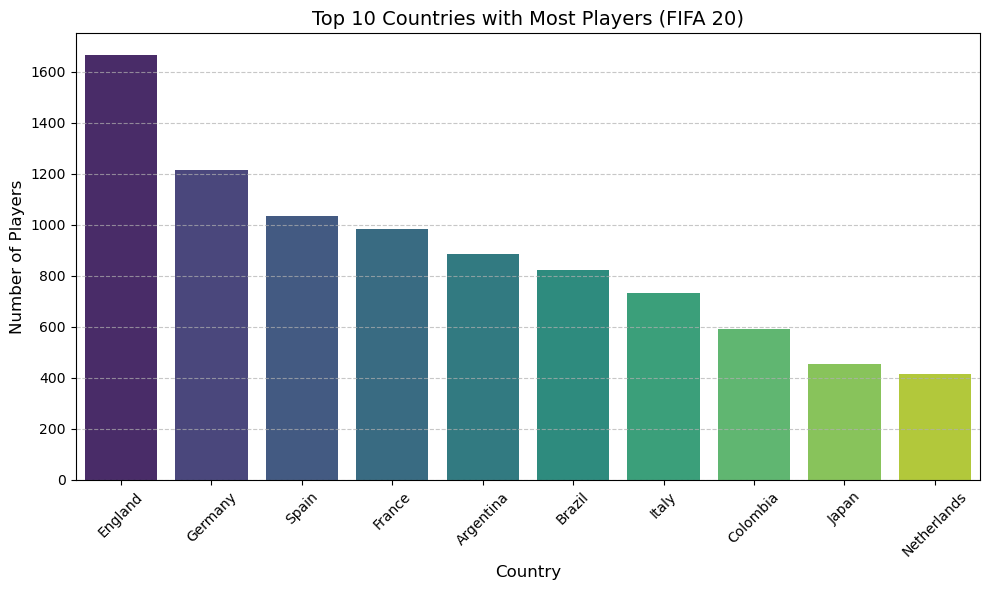

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=top10_countries, x='Country', y='Player_Count', palette='viridis')

plt.title('Top 10 Countries with Most Players (FIFA 20)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
df['overall'].describe()


count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

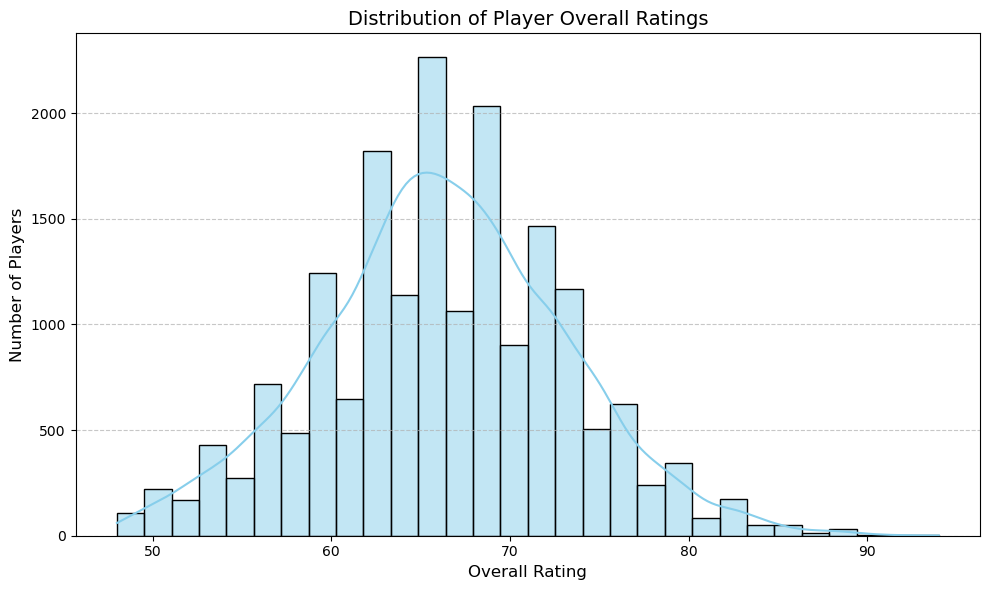

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['overall'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Player Overall Ratings', fontsize=14)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
corr_features = ['age', 'value_eur', 'wage_eur', 'overall']
corr_df = df[corr_features]
corr_df.head()


,age,value_eur,wage_eur,overall
0,32,95500000,565000,94
1,34,58500000,405000,93
2,27,105500000,290000,92
3,26,77500000,125000,91
4,28,90000000,470000,91


In [14]:
corr_matrix = corr_df.corr()
print(corr_matrix)


                age  value_eur  wage_eur   overall
age        1.000000   0.081513  0.151031  0.464305
value_eur  0.081513   1.000000  0.858052  0.638230
wage_eur   0.151031   0.858052  1.000000  0.573578
overall    0.464305   0.638230  0.573578  1.000000


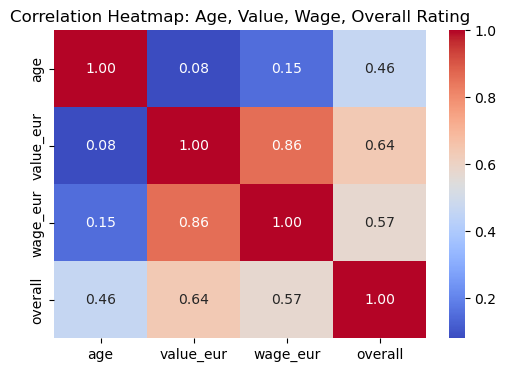

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Age, Value, Wage, Overall Rating')
plt.show()


In [16]:
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
cluster_df = df[skills].dropna()
cluster_df.head()


,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,69.0,54.0,58.0,64.0,56.0,66.0
4,91.0,83.0,86.0,94.0,35.0,66.0


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters


In [41]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=skills)
print(cluster_centers)


       pace  shooting   passing  dribbling  defending    physic
0  0.854807  1.048554  0.602640   0.929885  -1.009839 -0.220058
1  0.048497  0.132389 -0.620463  -0.200933  -1.293970 -1.269288
2 -0.017492  0.771996  1.235192   0.860345   0.897602  0.767926
3 -1.102089 -1.492986 -1.318769  -1.634423   0.651939  0.350712
4  0.039138 -0.258421  0.061606  -0.007482   0.473257  0.233049


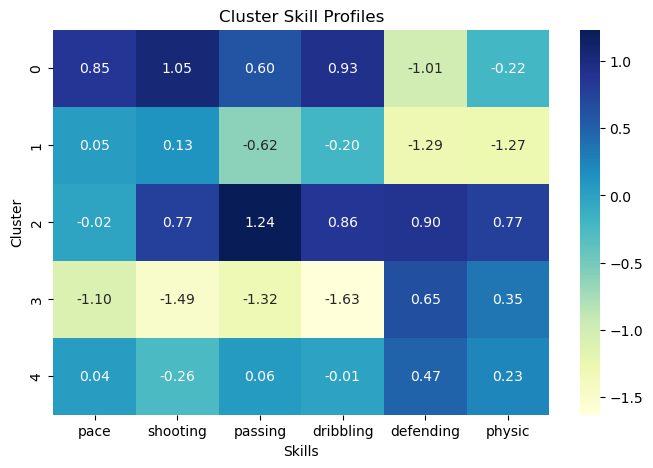

In [42]:
plt.figure(figsize=(8,5))
sns.heatmap(cluster_centers, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster Skill Profiles')
plt.xlabel('Skills')
plt.ylabel('Cluster')
plt.show()


In [43]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df.loc[cluster_df.index, 'Cluster'].values


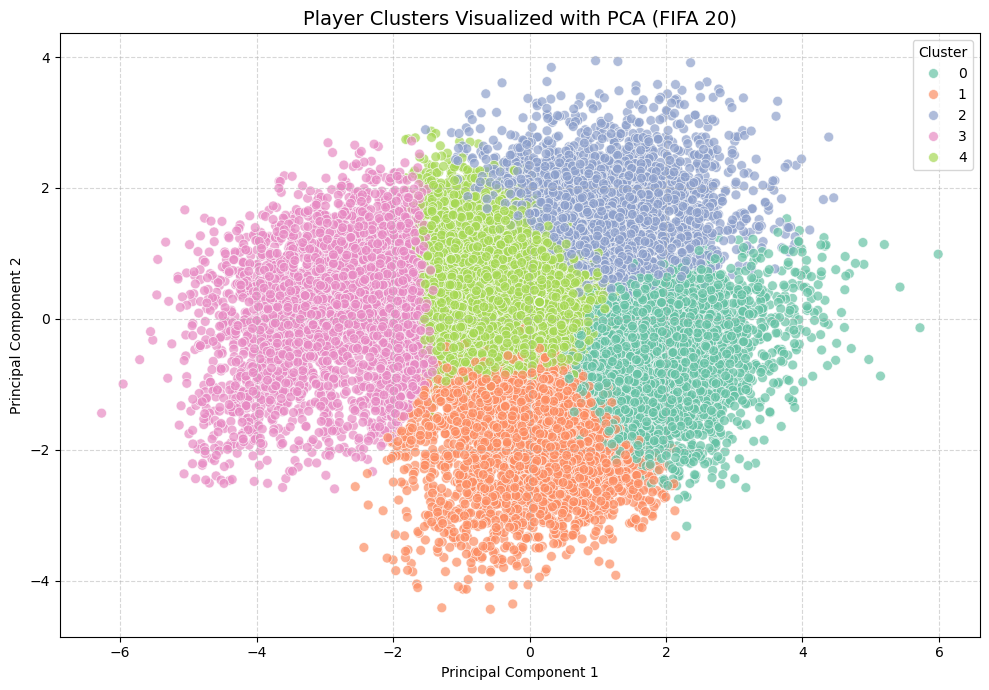

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PCA1', y='PCA2', 
    hue='Cluster', 
    data=pca_df, 
    palette='Set2', 
    alpha=0.7, 
    s=50
)

plt.title('Player Clusters Visualized with PCA (FIFA 20)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [45]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.47460449 0.28036096]
Total variance captured: 0.7549654527213827


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select skill columns for clustering
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df[features]

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)



In [52]:
df.head()
df['Cluster'].value_counts()


Cluster
0    6551
2    4660
3    3677
1    3390
Name: count, dtype: int64

In [53]:
cluster_df = df[['short_name', 'overall', 'age', 'pace', 'shooting', 'passing', 
                 'dribbling', 'defending', 'physic', 'Cluster']]


In [54]:
cluster_df.groupby('Cluster')[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].mean()


,pace,shooting,passing,dribbling,defending,physic
Cluster,,,,,,
0,72.862922,61.557472,61.575027,68.400397,46.079225,65.180583
1,69.883776,53.709440,52.295280,61.683481,33.380531,52.736578
2,66.916953,53.566524,63.993777,66.262876,66.416524,71.461159
3,58.204515,33.836008,45.909437,48.941800,61.686701,67.805004


In [55]:
df['Cluster'] = cluster_df['Cluster']


In [56]:
from sklearn.metrics import silhouette_score

# Try different cluster counts
scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    score = silhouette_score(scaled_features, km.labels_)
    scores.append(score)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({'K': range(2, 8), 'Silhouette_Score': scores})
print(comparison_df)



   K  Silhouette_Score
0  2          0.301204
1  3          0.276630
2  4          0.197951
3  5          0.254161
4  6          0.253083
5  7          0.241562


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Scale the feature set
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply KMeans with best K=2
kmeans_final = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(scaled_features)

# Check cluster distribution
print(df['Cluster'].value_counts())


Cluster
0    12979
1     5299
Name: count, dtype: int64


In [34]:
cluster_profile = df.groupby('Cluster')[features].mean().round(2)
print(cluster_profile)


          pace  shooting  passing  dribbling  defending  physic
Cluster                                                        
0        71.24     58.71    61.04      67.20      48.96   64.21
1        59.52     37.25    48.21      51.66      59.62   66.94


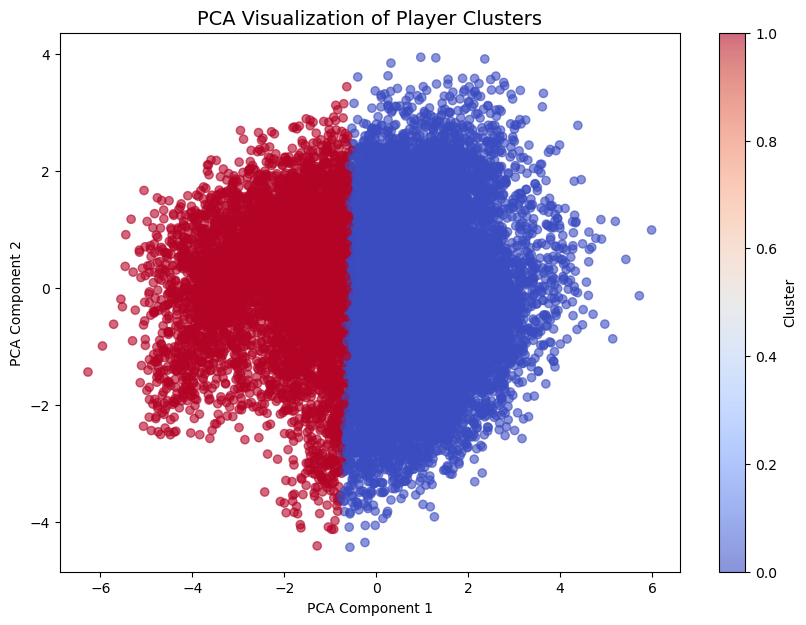

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select same feature columns
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply PCA (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='coolwarm', alpha=0.6)
plt.title('PCA Visualization of Player Clusters', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
# Top 10 players from each cluster
for c in df['Cluster'].unique():
    print(f"\nCluster {c} — Top 10 Players:")
    display(df[df['Cluster'] == c][['short_name', 'age', 'nationality', 'overall',
                                    'pace', 'shooting', 'passing', 'dribbling', 
                                    'defending', 'physic']].sort_values('overall', ascending=False).head(10))



Cluster 0 — Top 10 Players:


,short_name,age,nationality,overall,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,Argentina,94,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,34,Portugal,93,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,27,Brazil,92,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,26,Slovenia,91,69.0,54.0,58.0,64.0,56.0,66.0
5,K. De Bruyne,28,Belgium,91,76.0,86.0,92.0,86.0,61.0,78.0
4,E. Hazard,28,Belgium,91,91.0,83.0,86.0,94.0,35.0,66.0
6,M. ter Stegen,27,Germany,90,69.0,54.0,58.0,64.0,56.0,66.0
7,V. van Dijk,27,Netherlands,90,77.0,60.0,70.0,71.0,90.0,86.0
9,M. Salah,27,Egypt,90,93.0,86.0,81.0,89.0,45.0,74.0
8,L. Modrić,33,Croatia,90,74.0,76.0,89.0,89.0,72.0,66.0



Cluster 1 — Top 10 Players:


,short_name,age,nationality,overall,pace,shooting,passing,dribbling,defending,physic
11,K. Koulibaly,28,Senegal,89,71.0,28.0,54.0,67.0,89.0,87.0
16,G. Chiellini,34,Italy,89,68.0,46.0,58.0,60.0,90.0,82.0
35,D. Godín,33,Uruguay,88,60.0,48.0,64.0,61.0,89.0,83.0
57,M. Škriniar,24,Slovakia,86,69.0,41.0,59.0,66.0,87.0,82.0
77,N. Süle,23,Germany,85,72.0,42.0,55.0,50.0,86.0,82.0
83,J. Giménez,24,Uruguay,85,69.0,45.0,52.0,54.0,86.0,82.0
90,K. Manolas,28,Greece,85,82.0,25.0,42.0,60.0,86.0,81.0
128,Pepe,36,Portugal,84,67.0,51.0,57.0,60.0,85.0,85.0
136,Javi Martínez,30,Spain,84,48.0,55.0,69.0,63.0,86.0,83.0
156,Felipe,30,Brazil,84,64.0,41.0,57.0,60.0,84.0,87.0


In [37]:
df['Player_Type'] = df['Cluster'].map({
    0: 'Attacking / Skillful Players',
    1: 'Defensive / Physical Players'
})


In [38]:
df[['short_name', 'overall', 'Player_Type']].head(20)


,short_name,overall,Player_Type
0,L. Messi,94,Attacking / Skillful Players
1,Cristiano Ronaldo,93,Attacking / Skillful Players
2,Neymar Jr,92,Attacking / Skillful Players
3,J. Oblak,91,Attacking / Skillful Players
4,E. Hazard,91,Attacking / Skillful Players
5,K. De Bruyne,91,Attacking / Skillful Players
6,M. ter Stegen,90,Attacking / Skillful Players
7,V. van Dijk,90,Attacking / Skillful Players
8,L. Modrić,90,Attacking / Skillful Players
9,M. Salah,90,Attacking / Skillful Players


In [39]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select same features used in clustering
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Compute silhouette score for final K=2 model
score = silhouette_score(scaled_features, df['Cluster'])
print("Silhouette Score for K=2 Clusters:", round(score, 4))


Silhouette Score for K=2 Clusters: 0.3012
